<a href="https://colab.research.google.com/github/UpadhyeN/tensorflow/blob/main/Multi_classmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

1. Become one with the data
2. Preprocess the data
3. Create a model
4. Fit the model (overfit the data)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model
7. Repeat the satisfied

Multi class modification. Become one with the data

In [3]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip the data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip','r')
zip_ref.extractall()
zip_ref.close()

--2023-02-09 17:09:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.161.128, 74.125.126.128, 74.125.70.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.161.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   136MB/s    in 3.8s    

2023-02-09 17:09:56 (131 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [4]:
import os
for dirpath,dirnames,filenames in os.walk('10_food_classes_all_data'):
  print(dirnames)
  print(filenames)

['train', 'test']
[]
['ice_cream', 'pizza', 'hamburger', 'chicken_curry', 'grilled_salmon', 'ramen', 'fried_rice', 'steak', 'chicken_wings', 'sushi']
[]
[]
['1352507.jpg', '606241.jpg', '2337057.jpg', '258802.jpg', '612548.jpg', '1147925.jpg', '904496.jpg', '1541974.jpg', '370140.jpg', '224718.jpg', '164659.jpg', '575321.jpg', '914855.jpg', '3299559.jpg', '2281793.jpg', '2535342.jpg', '575058.jpg', '2570028.jpg', '45059.jpg', '316451.jpg', '806395.jpg', '2494775.jpg', '1393047.jpg', '864405.jpg', '2097370.jpg', '581343.jpg', '1995311.jpg', '833261.jpg', '987631.jpg', '476199.jpg', '670788.jpg', '395122.jpg', '2477769.jpg', '3846885.jpg', '1490964.jpg', '734476.jpg', '2161634.jpg', '3813912.jpg', '1291046.jpg', '3059792.jpg', '2043407.jpg', '945740.jpg', '3685309.jpg', '137699.jpg', '205612.jpg', '393886.jpg', '3693565.jpg', '2948329.jpg', '680155.jpg', '102595.jpg', '2454779.jpg', '919447.jpg', '921876.jpg', '89027.jpg', '1436130.jpg', '631683.jpg', '3193967.jpg', '1508158.jpg', '12894

In [5]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Feb  9 17:09 .
drwxr-xr-x  1 root root 4096 Feb  9 17:09 ..
drwxr-xr-x 12 root root 4096 Feb  9 17:09 test
drwxr-xr-x 12 root root 4096 Feb  9 17:09 train


In [6]:
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [7]:
# visualizing the data
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  # read in the image
  img = mpimg.imread(target_folder + '/'+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  return img


['476099.jpg']


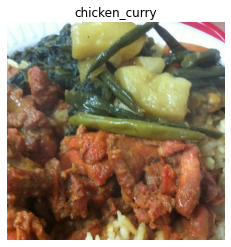

In [9]:
random_class = random.choice(class_names)
img = view_random_image(target_dir = "10_food_classes_all_data/train/",target_class=random_class)

Pre process the data (prepare it for a model)

In [10]:
from locale import resetlocale
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                           target_size = (224,224),
                           batch_size = 32,
                           class_mode='categorical'
                           )

test_data = test_datagen.flow_from_directory(test_dir,
                         target_size= (224,224),
                         batch_size=32,
                         class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


Create a CNN model (start with a baseline)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation

model_8 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax') # changed to have 10 output and activation is softmax

])

In [12]:
# compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [13]:
## fiting the model


In [14]:
history_8 = model_8.fit(train_data,# 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 58s 208ms/step - loss: 2.1988 - accuracy: 0.1815 - val_loss: 2.0714 - val_accuracy: 0.2572
Epoch 2/5
235/235 [==============================] - 49s 211ms/step - loss: 1.9334 - accuracy: 0.3225 - val_loss: 1.8922 - val_accuracy: 0.3260
Epoch 3/5
235/235 [==============================] - 48s 206ms/step - loss: 1.6388 - accuracy: 0.4500 - val_loss: 1.9561 - val_accuracy: 0.3240
Epoch 4/5
235/235 [==============================] - 47s 201ms/step - loss: 1.1114 - accuracy: 0.6363 - val_loss: 2.2924 - val_accuracy: 0.3104
Epoch 5/5
235/235 [==============================] - 49s 210ms/step - loss: 0.5283 - accuracy: 0.8361 - val_loss: 3.0027 - val_accuracy: 0.2912


In [15]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history["val_loss"]
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))
# plot the loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.legend()
# plot the accuracy
# plt.figure() to create new figure
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.legend()


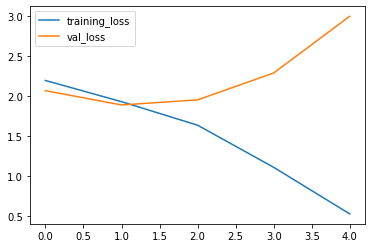

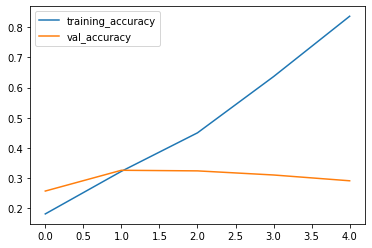

In [16]:
plot_loss_curves(history_8)

Evaluate the model

In [17]:
model_8.evaluate(test_data)

79/79 [==============================] - 12s 145ms/step - loss: 3.0027 - accuracy: 0.2912


[3.0027098655700684, 0.29120001196861267]

our models seems overfitting on the data
how to reduce the overfitting.
1. get more data
2. augement the data
3. simplfy the model
  reduce the layers
4. Use transfer learning


**removing some hidden layers**


In [19]:
model_9 = Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [20]:
model_9.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 29160)             0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [21]:
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 47s 199ms/step - loss: 2.1141 - accuracy: 0.2521 - val_loss: 1.9470 - val_accuracy: 0.3192
Epoch 2/5
235/235 [==============================] - 48s 203ms/step - loss: 1.7241 - accuracy: 0.4189 - val_loss: 1.9337 - val_accuracy: 0.3412
Epoch 3/5
235/235 [==============================] - 56s 240ms/step - loss: 1.2574 - accuracy: 0.5879 - val_loss: 2.0554 - val_accuracy: 0.3256
Epoch 4/5
235/235 [==============================] - 47s 201ms/step - loss: 0.7460 - accuracy: 0.7747 - val_loss: 2.3939 - val_accuracy: 0.3132
Epoch 5/5
235/235 [==============================] - 46s 196ms/step - loss: 0.3799 - accuracy: 0.8977 - val_loss: 3.0848 - val_accuracy: 0.2892


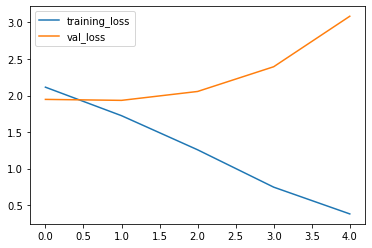

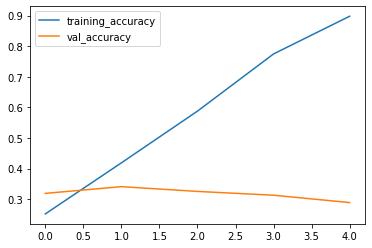

In [22]:
plot_loss_curves(history_9)

**data augmentation** to reduce overfitting

In [23]:
# create an augmented data
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)



In [24]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode = "categorical")

Found 7500 images belonging to 10 classes.


**another model with augmented data**

In [25]:
model_10 = tf.keras.models.clone_model(model_8)

In [27]:
model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])
model_10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

In [28]:
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data = test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 122s 516ms/step - loss: 2.1992 - accuracy: 0.1891 - val_loss: 2.0265 - val_accuracy: 0.2784
Epoch 2/5
235/235 [==============================] - 121s 516ms/step - loss: 2.1121 - accuracy: 0.2381 - val_loss: 1.9816 - val_accuracy: 0.3032
Epoch 3/5
235/235 [==============================] - 119s 506ms/step - loss: 2.0728 - accuracy: 0.2624 - val_loss: 1.9539 - val_accuracy: 0.2832
Epoch 4/5
235/235 [==============================] - 120s 511ms/step - loss: 2.0313 - accuracy: 0.2857 - val_loss: 1.9306 - val_accuracy: 0.3404
Epoch 5/5
235/235 [==============================] - 120s 509ms/step - loss: 1.9904 - accuracy: 0.3048 - val_loss: 1.7811 - val_accuracy: 0.3748


In [29]:
model_10.evaluate(test_data)

79/79 [==============================] - 13s 159ms/step - loss: 1.7811 - accuracy: 0.3748


[1.7811254262924194, 0.3747999966144562]

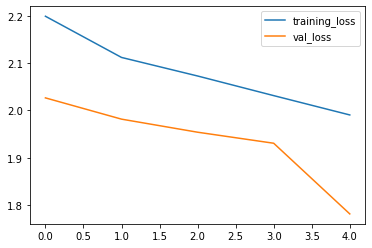

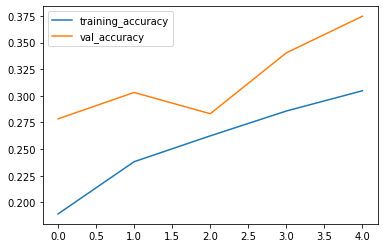

In [31]:
plot_loss_curves(history_10)

Good job nachiket